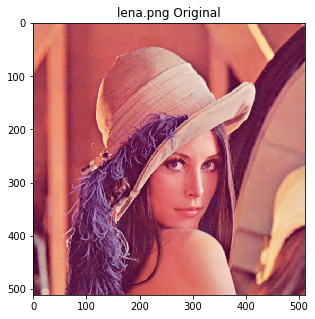

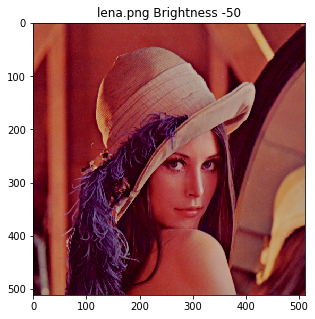

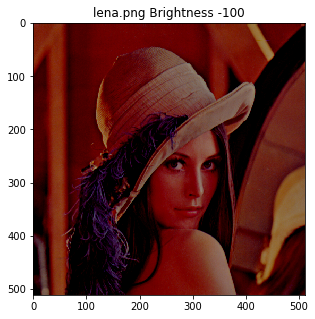

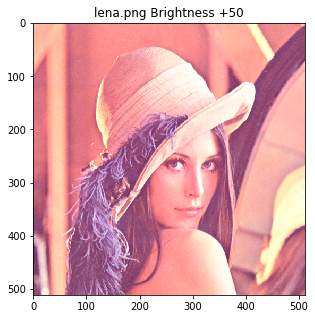

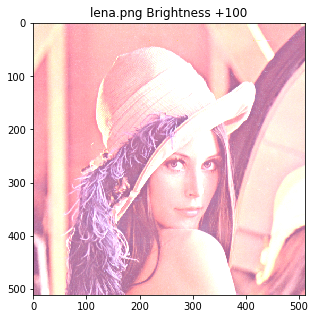

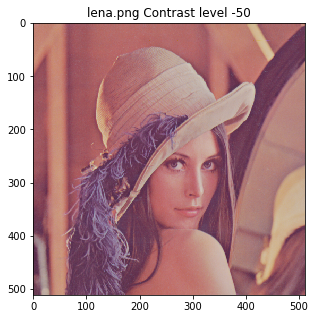

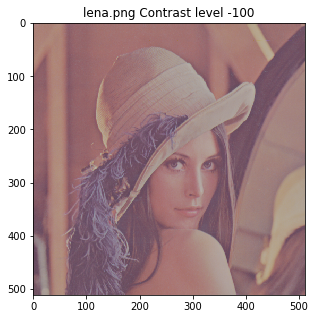

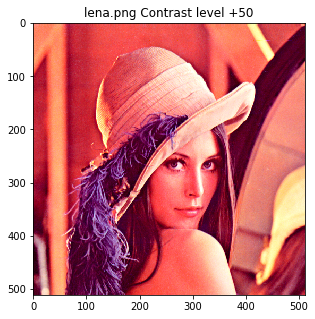

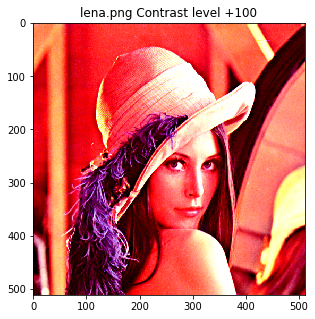

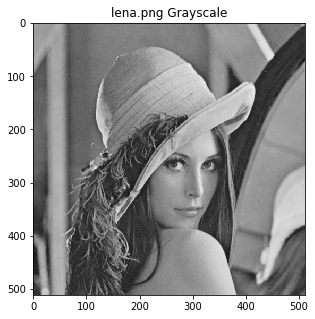

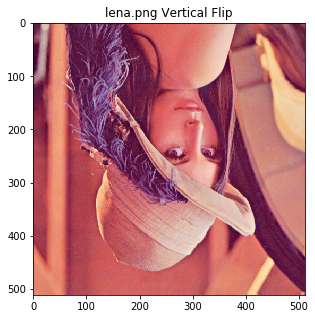

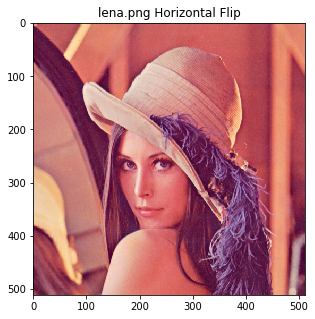

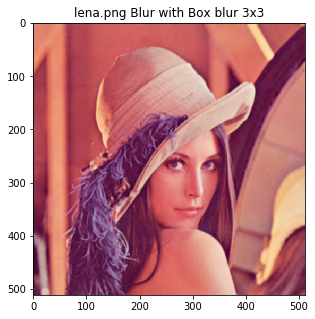

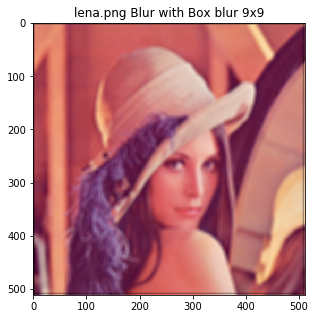

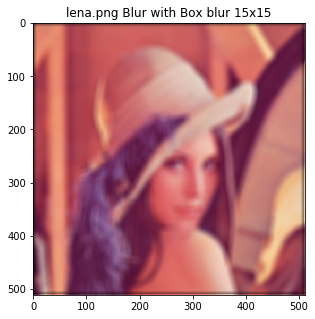

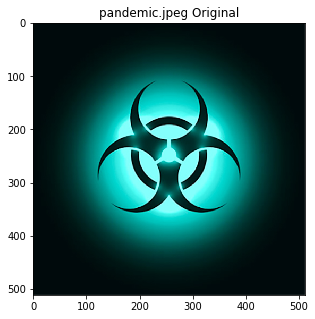

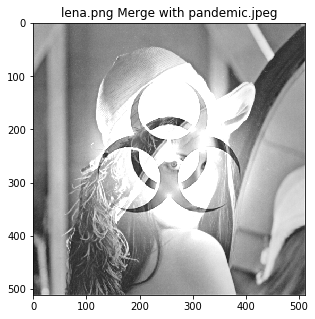

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class count:
  def __init__(self):
    self.quantity = 0
  def get(self):
    self.quantity += 1
    return self.quantity

c = count()

class image:
  def __init__(self, name):
    self.name = name
    self.img_2d = np.array(Image.open(name), dtype=np.uint16)
    self.trunc = lambda pixel : max(0, min(255, pixel))
    self.add_to_show(self.img_2d, "{} Original".format(self.name))
  
  def add_to_show(self, img_2d, name="Original"):
    plt.figure(c.get(), figsize=(5, 5))
    plt.clf()
    plt.title(name)
    plt.imshow(img_2d)
    
  def show(self):
    plt.show()

  def change_brightness(self, brightness, show=True):
    res = np.vectorize(self.trunc)(self.img_2d + brightness)
    if show:
      self.add_to_show(res, "{} Brightness {}{}".format(self.name, "+" if brightness > 0 else "", brightness))
    return res

  def change_contrast(self, level, show=True):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    contrast = lambda pixel : self.trunc(int(128 + factor * (pixel - 128)))
    res = np.vectorize(contrast)(self.img_2d)
    if show:
      self.add_to_show(res, "{} Contrast level {}{}".format(self.name, "+" if level > 0 else "", level))
    return res

  def grayscale(self, show=True):
    tmp = np.asarray(np.dot(self.img_2d, [.3, .59, .11]), dtype=np.uint16)
    res = np.dstack([tmp] * 3)
    if show:
      self.add_to_show(res, "{} Grayscale".format(self.name))
    return res

  def flip(self, axis=1, show=True):
    res = self.img_2d[:, ::-1] if axis == 1 else self.img_2d[::-1, :]
    if show:
      self.add_to_show(res, "{} {} Flip".format(self.name, "Horizontal" if axis == 1 else "Vertical"))
    return res

  def merge(self, img, show=True):
    my_img_gray = self.grayscale(show=False)
    your_img_gray = img.grayscale(show=False)
    res = np.vectorize(self.trunc)(my_img_gray + your_img_gray)
    if show:
      self.add_to_show(res, "{} Merge with {}".format(self.name, img.name))
    return res

  def blur(self, box_size = 3, show=True):
    ml = lambda arr : np.insert(arr, -1, 0, axis=1)[:, 1:]
    mr = lambda arr : np.insert(arr, 0, 0, axis=1)[:, :-1]
    mu = lambda arr : np.insert(arr, -1, 0, axis=0)[1:, :]
    md = lambda arr : np.insert(arr, 0, 0, axis=0)[:-1, :]

    a = self.img_2d
    pad = int(box_size / 2)

    lr, alr = [ml, mr], [[a], [a]]
    ud, aud = [mu, md], [[], []]
    
    for i in range(pad):
      for j in range(2):
        alr[j].append(lr[j](alr[j][-1]))

    alr[0] = alr[0][1:]

    for i in range(2):
      for lr in alr[i]:
        for j in range(2):
          tmp = lr
          for k in range(pad):
            tmp = ud[j](tmp)
            aud[j].append(tmp)

    [al, ar], [au, ad] = alr, aud
    res = np.mean(np.concatenate([al, ar, au, ad]), axis=0, dtype=np.uint16)

    if show:
      self.add_to_show(res, "{} Blur with Box blur {}x{}".format(self.name, box_size, box_size))
    return res


if __name__ == '__main__':
  # Load image lena.png
  lena = image("lena.png")

  # Change brightness with brightness -50, -100, +50, +100
  lena.change_brightness(-50)
  lena.change_brightness(-100)
  lena.change_brightness(50)
  lena.change_brightness(100)

  # Change contrast with level -50, -100, +50, +100
  lena.change_contrast(-50)
  lena.change_contrast(-100)
  lena.change_contrast(50)
  lena.change_contrast(100)

  # Convert to grayscale image
  lena.grayscale()

  # Flip image, axis=0 is vertical flip, axis=1 is horizontal flip
  lena.flip(axis=0)
  lena.flip(axis=1)

  # Blur image with Box Blur box_size x box_size, ex: box_size=3 mean kernel is 3x3
  lena.blur(box_size=3)
  lena.blur(box_size=9)
  lena.blur(box_size=15)

  # Load image pandemic.jpeg (has same size as lena.png)
  pan = image("pandemic.jpeg")

  # Merge pandemic.jpeg to lena.png
  lena.merge(pan)

  # Show all effects on lena.png we did
  lena.show()
  